#  BM20A6100 Advanced Data Analysis and Machine Learning
## Erik Kuitunen, 0537275

### Kernel Principal Component Analysis


Read data, scale and visualize


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Flowmeters/Meter A", delimiter="	", header=None)
col_names = df.columns.tolist() 

df

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,0.841499,1.009367,0.993816,8.469805,10.278727,10.037759,8.501365,8.581726,10.247763,10.058822,...,32.451173,34.568685,33.082683,36.722005,36.969403,36.075847,36.051432,35.174155,32.729490,1
1,0.842250,1.006584,0.996605,7.531891,9.139924,8.951618,7.612213,7.623325,9.106345,8.945142,...,32.428385,34.441732,33.081055,36.687825,36.933595,36.054688,35.979818,34.847005,32.731122,1
2,0.840723,1.011647,0.998152,6.641699,7.975464,7.857692,6.593117,6.681572,7.964596,7.814698,...,32.428385,34.275715,33.113605,36.661785,36.873370,36.002605,35.963542,34.689128,32.771810,1
3,0.841119,1.017807,0.996812,5.687524,6.824334,6.689885,5.615428,5.763315,6.801051,6.686639,...,32.485350,34.080403,33.170573,36.673177,36.811525,35.974935,35.955403,34.500328,32.849935,1
4,0.840358,1.016534,0.996221,5.660385,6.829560,6.675628,5.623977,5.736818,6.813453,6.672377,...,32.503255,34.122720,33.164062,36.673177,36.826173,35.996095,35.968425,34.474283,32.853190,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,0.792929,1.006295,0.999666,2.696691,3.414048,3.389731,2.699618,2.715628,3.414042,3.393569,...,32.555338,33.767905,33.300782,36.640627,36.691080,35.849610,35.834960,33.823245,33.012697,2
83,0.792309,1.004472,0.999873,2.679006,3.433638,3.386612,2.714345,2.699840,3.429142,3.380373,...,32.545573,33.769532,33.294272,36.634115,36.692707,35.859377,35.844727,33.819987,33.022460,2
84,0.793471,1.009560,1.001110,2.691553,3.431745,3.364790,2.717383,2.700560,3.432876,3.374046,...,32.561848,33.780925,33.287762,36.635745,36.694335,35.854492,35.831705,33.824870,33.020832,2
85,0.796730,1.010570,0.999029,2.714849,3.412818,3.388927,2.692776,2.738119,3.413739,3.381779,...,32.555338,33.774415,33.302410,36.640627,36.699218,35.859377,35.849610,33.816732,33.011067,2


<Axes: >

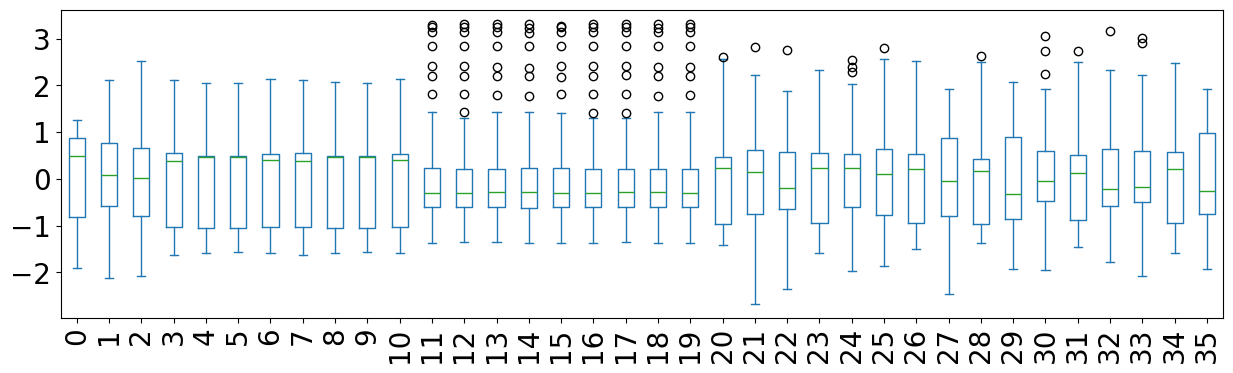

In [18]:
from sklearn.preprocessing import StandardScaler    

XData = df.iloc[ :, :-1 ].values
YData = df.iloc[ :, 1 ].values

scaler = StandardScaler()
scaler.fit( XData )
XData_scaled = scaler.transform( XData )

pd.DataFrame( XData_scaled ).plot( kind = 'box', 
                                   figsize = (15,4), 
                                   rot = 90, 
                                   fontsize = 20, 
                                   sharey = False )


Defining kernels

In [19]:
def linear_kernel(X1, X2):
    k_xixj = np.dot( X1, X2 )
    return k_xixj

def polynomial_kernel(X1, X2, degree = 2):
    k_xixj = ( np.dot( X1, X2 ) + 1 ) ** degree
    return k_xixj

def gaussian_kernel(X1, X2, sigma = 1):
    k_xixj = np.exp( -np.linalg.norm( X1 - X2 ) ** 2 / ( 2 * sigma ** 2 ) )
    return k_xixj

Calculating the Gram matrix using a kernel and centering 

In [21]:
# First using the linear kernel
Nsamples = XData_scaled.shape[0]
K = np.zeros( ( Nsamples, Nsamples ) )
for ii in range( Nsamples ):
    for jj in range( ii, Nsamples ):
        elem = linear_kernel( XData_scaled[ ii, : ], XData_scaled[ jj, : ] )
        K[ ii, jj ] = linear_kernel( XData_scaled[ ii, : ], XData_scaled[ jj, : ] )
        
        if ii != jj:
            K[ jj, ii ] = K[ ii, jj ]

Ktilde = ( I - 1/Nsamples * np.ones( ( Nsamples, Nsamples ) ) ).dot( K ).dot( I - 1/Nsamples * np.ones( ( Nsamples, Nsamples ) ) )



array([[121.71154931,  82.69431455,  52.13868301, ..., -66.34799281,
        -63.21810753, -73.66804654],
       [ 82.69431455,  67.4436717 ,  47.45146107, ..., -47.21872303,
        -46.53852257, -59.05507407],
       [ 52.13868301,  47.45146107,  36.93661665, ..., -30.59806252,
        -30.92090955, -42.4973471 ],
       ...,
       [-66.34799281, -47.21872303, -30.59806252, ...,  40.92289427,
         37.88303743,  44.30269538],
       [-63.21810753, -46.53852257, -30.92090955, ...,  37.88303743,
         36.35552773,  44.12424347],
       [-73.66804654, -59.05507407, -42.4973471 , ...,  44.30269538,
         44.12424347,  62.11165576]])

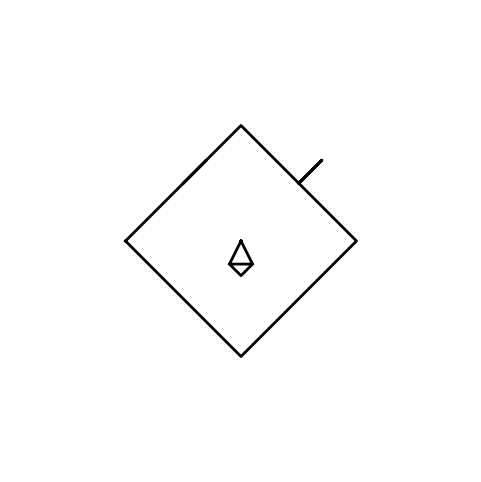